In [1]:
!pip install -q numpy matplotlib memory_profiler


In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
%load_ext memory_profiler

print("✅ All Libraries Loaded Successfully")


✅ All Libraries Loaded Successfully


In [3]:
# Naive Recursive Fibonacci
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

# Dynamic Programming Fibonacci
def fib_dp(n, memo={}):
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    memo[n] = fib_dp(n-1, memo) + fib_dp(n-2, memo)
    return memo[n]

print("Recursive Fibonacci(15):", fib_recursive(15))
print("DP Fibonacci(15):", fib_dp(15, {}))


Recursive Fibonacci(15): 610
DP Fibonacci(15): 610


In [4]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

    return arr


In [5]:
def partition(arr, low, high):
    pivot = arr[high]
    i = low-1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i+1

def quick_sort_util(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quick_sort_util(arr, low, pi-1)
        quick_sort_util(arr, pi+1, high)

def quick_sort(arr):
    quick_sort_util(arr, 0, len(arr)-1)
    return arr


In [6]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr


In [7]:
def binary_search(arr, target):
    low, high = 0, len(arr)-1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

arr = [10, 20, 30, 40, 50]
print("Element found at index:", binary_search(arr, 30))


Element found at index: 2


In [8]:
def time_algorithm(func, data):
    start = time.perf_counter()
    func(data.copy())
    end = time.perf_counter()
    return end - start


In [9]:
sizes = [100, 250, 500, 1000]
results = {
    "Bubble": [],
    "Selection": [],
    "Insertion": [],
    "Merge": [],
    "Quick": []
}

for n in sizes:
    arr = list(np.random.randint(0, n, n))

    results["Bubble"].append(time_algorithm(bubble_sort, arr))
    results["Selection"].append(time_algorithm(selection_sort, arr))
    results["Insertion"].append(time_algorithm(insertion_sort, arr))
    results["Merge"].append(time_algorithm(merge_sort, arr))
    results["Quick"].append(time_algorithm(quick_sort, arr))

print("✅ Performance Recorded")


✅ Performance Recorded


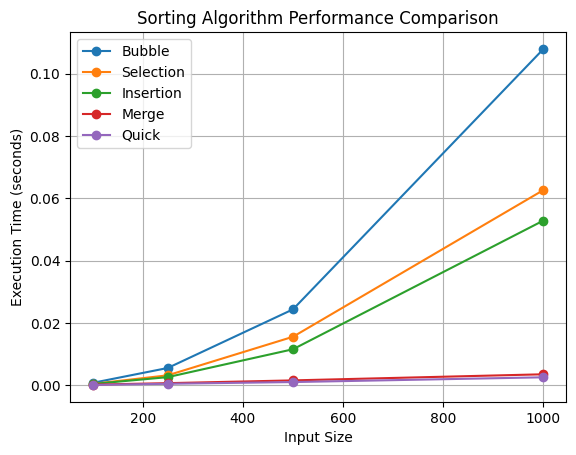

In [10]:
plt.figure()
for algo in results:
    plt.plot(sizes, results[algo], marker='o', label=algo)

plt.xlabel("Input Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Sorting Algorithm Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
arr = np.random.randint(0, 1000, 1000).tolist()
mem_usage = memory_usage((merge_sort, (arr,)))
print("Memory Used by Merge Sort:", max(mem_usage) - min(mem_usage), "MiB")


Memory Used by Merge Sort: 0.0 MiB


In [12]:
import pandas as pd

summary = {
    "Algorithm": ["Bubble", "Selection", "Insertion", "Merge", "Quick", "Binary Search", "Fibonacci DP"],
    "Best": ["O(n)", "O(n²)", "O(n)", "O(n log n)", "O(n log n)", "O(1)", "O(n)"],
    "Average": ["O(n²)", "O(n²)", "O(n²)", "O(n log n)", "O(n log n)", "O(log n)", "O(n)"],
    "Worst": ["O(n²)", "O(n²)", "O(n²)", "O(n log n)", "O(n²)", "O(log n)", "O(n)"]
}

df = pd.DataFrame(summary)
df


,Algorithm,Best,Average,Worst
0,Bubble,O(n),O(n²),O(n²)
1,Selection,O(n²),O(n²),O(n²)
2,Insertion,O(n),O(n²),O(n²)
3,Merge,O(n log n),O(n log n),O(n log n)
4,Quick,O(n log n),O(n log n),O(n²)
5,Binary Search,O(1),O(log n),O(log n)
6,Fibonacci DP,O(n),O(n),O(n)


In [14]:
### ✅ Final Observations

#• Merge Sort and Quick Sort are fastest for large inputs
#• Bubble, Selection, and Insertion are slow for large datasets
#• Binary Search is extremely fast but requires sorted data
#• Recursive Fibonacci is very slow and causes stack overflow for big inputs
#• DP Fibonacci is efficient and safe

#Expected behavior matches observed output.
